In [592]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [593]:
df_mar = pd.read_excel('2022-Mar-Funding.xlsx', header=[1])
df_apr = pd.read_excel('2022-Apr-Funding.xlsx', header=[1])
df_may = pd.read_excel('2022-May-Funding.xlsx', header=[1])

df= pd.concat([df_mar,df_apr,df_may])
df

,ID,Company,Home Page,City,State,Country,Business,Funding,Year Founded
0,BPG0021598,3Spine,https://3spine.com/,Chattanooga,TN,US,Lumbar Joint Replacement,$33M C Mar 2022,2017.0
1,BPG0019090,Activ Surgical,https://www.activsurgical.com/,Boston,MA,US,Surgical Software,$15M B Mar 2022,2017.0
2,BPG0021334,Affini-T Therapeutics,https://www.affinittx.com/,Watertown,MA,US,TCR Cell Therapy,$175M Mar 2022,NaN
3,BPG0021568,AiM Medical Robotics,https://www.aimmedicalrobotics.com/,Fort Lauderdale,FL,US,MRI-compatible intraoperative robotics,$3.4M A Mar 2022,2018.0
4,BPG0021599,Aptatek BioSciences,https://aptatek.com/,Princeton,NJ,US,Small Molecule Biomarker Sensor,$4M Seed Mar 2022,NaN
...,...,...,...,...,...,...,...,...,...
31,BPG0012919,SwanBio Therapeutics,https://www.swanbiotx.com/,Bala Cynwyd,PA,US,Gene Therapy,$56M B May 2022,2017.0
32,BPG0021950,Therapixel,https://www.therapixel.com/,Nice,France,France,Artifical Intelligence for Medical Imaging,€15M B May 2022,2013.0
33,BPG0021999,Ultima Genomics,https://www.ultimagenomics.com/,Newark,CA,US,"High-throughput, low-cost sequencing platform",$600M May 2022,2017.0
34,BPG0020740,VivaSure Medical,https://vivasuremedical.com/,Galway,Ireland,Ireland,Arteriotomy patch,€22M D May 2022,2009.0


In [594]:
df_clean = df.drop(['ID', 'State', 'Year Founded'], axis=1)
df_clean

,Company,Home Page,City,Country,Business,Funding
0,3Spine,https://3spine.com/,Chattanooga,US,Lumbar Joint Replacement,$33M C Mar 2022
1,Activ Surgical,https://www.activsurgical.com/,Boston,US,Surgical Software,$15M B Mar 2022
2,Affini-T Therapeutics,https://www.affinittx.com/,Watertown,US,TCR Cell Therapy,$175M Mar 2022
3,AiM Medical Robotics,https://www.aimmedicalrobotics.com/,Fort Lauderdale,US,MRI-compatible intraoperative robotics,$3.4M A Mar 2022
4,Aptatek BioSciences,https://aptatek.com/,Princeton,US,Small Molecule Biomarker Sensor,$4M Seed Mar 2022
...,...,...,...,...,...,...
31,SwanBio Therapeutics,https://www.swanbiotx.com/,Bala Cynwyd,US,Gene Therapy,$56M B May 2022
32,Therapixel,https://www.therapixel.com/,Nice,France,Artifical Intelligence for Medical Imaging,€15M B May 2022
33,Ultima Genomics,https://www.ultimagenomics.com/,Newark,US,"High-throughput, low-cost sequencing platform",$600M May 2022
34,VivaSure Medical,https://vivasuremedical.com/,Galway,Ireland,Arteriotomy patch,€22M D May 2022


In [595]:
df_clean['Country'].value_counts().sort_values(ascending=False)

US             102
China            9
Israel           7
UK               6
Switzerland      4
France           3
Spain            3
Netherlands      2
Japan            2
Korea            2
Sweden           2
Canada           2
Germany          1
Argentina        1
Italy            1
Belgium          1
Portugal         1
Singapore        1
Australia        1
Ireland          1
Name: Country, dtype: int64

In [596]:
def find_Serie(string, list):
    for serie in list:
        if serie in string:
            return serie
        else:
            pass

In [597]:
df_clean['Funding (Millions)'] = df_clean['Funding'].apply(lambda x: x.split(' ')[0])
df_clean['Currency'] = df_clean['Funding'].apply(lambda x: x[0])
df_clean['Series'] = df_clean['Funding'].apply(lambda x: find_Serie(x, [' A ', ' B ', ' C ', ' D ', ' E ', 'Seed']))
#df_clean['Series'] = df_clean['Funding'].apply(lambda x: x.split(' ')[1] if x.split(' ')[1] in 'ABCD' else 'NA' )


df_clean


,Company,Home Page,City,Country,Business,Funding,Funding (Millions),Currency,Series
0,3Spine,https://3spine.com/,Chattanooga,US,Lumbar Joint Replacement,$33M C Mar 2022,$33M,$,C
1,Activ Surgical,https://www.activsurgical.com/,Boston,US,Surgical Software,$15M B Mar 2022,$15M,$,B
2,Affini-T Therapeutics,https://www.affinittx.com/,Watertown,US,TCR Cell Therapy,$175M Mar 2022,$175M,$,None
3,AiM Medical Robotics,https://www.aimmedicalrobotics.com/,Fort Lauderdale,US,MRI-compatible intraoperative robotics,$3.4M A Mar 2022,$3.4M,$,A
4,Aptatek BioSciences,https://aptatek.com/,Princeton,US,Small Molecule Biomarker Sensor,$4M Seed Mar 2022,$4M,$,Seed
...,...,...,...,...,...,...,...,...,...
31,SwanBio Therapeutics,https://www.swanbiotx.com/,Bala Cynwyd,US,Gene Therapy,$56M B May 2022,$56M,$,B
32,Therapixel,https://www.therapixel.com/,Nice,France,Artifical Intelligence for Medical Imaging,€15M B May 2022,€15M,€,B
33,Ultima Genomics,https://www.ultimagenomics.com/,Newark,US,"High-throughput, low-cost sequencing platform",$600M May 2022,$600M,$,None
34,VivaSure Medical,https://vivasuremedical.com/,Galway,Ireland,Arteriotomy patch,€22M D May 2022,€22M,€,D


In [598]:
def find_strip_str(string, list):
    for character in list:
        if character in string:
            new=string.lstrip(character)
        else:
            pass
    return new


# y=find_in_str('sek9M Apr 2022', ['sek'])
# y

In [599]:
df_clean['Funding (Millions)']=df_clean['Funding (Millions)'].apply(lambda x: find_strip_str(x, ['$','€','£', 'SEK', 'CHF','A$']))
df_clean['Funding (Millions)']=df_clean['Funding (Millions)'].apply(lambda x: x.rstrip('M'))

df_clean

,Company,Home Page,City,Country,Business,Funding,Funding (Millions),Currency,Series
0,3Spine,https://3spine.com/,Chattanooga,US,Lumbar Joint Replacement,$33M C Mar 2022,33,$,C
1,Activ Surgical,https://www.activsurgical.com/,Boston,US,Surgical Software,$15M B Mar 2022,15,$,B
2,Affini-T Therapeutics,https://www.affinittx.com/,Watertown,US,TCR Cell Therapy,$175M Mar 2022,175,$,None
3,AiM Medical Robotics,https://www.aimmedicalrobotics.com/,Fort Lauderdale,US,MRI-compatible intraoperative robotics,$3.4M A Mar 2022,3.4,$,A
4,Aptatek BioSciences,https://aptatek.com/,Princeton,US,Small Molecule Biomarker Sensor,$4M Seed Mar 2022,4,$,Seed
...,...,...,...,...,...,...,...,...,...
31,SwanBio Therapeutics,https://www.swanbiotx.com/,Bala Cynwyd,US,Gene Therapy,$56M B May 2022,56,$,B
32,Therapixel,https://www.therapixel.com/,Nice,France,Artifical Intelligence for Medical Imaging,€15M B May 2022,15,€,B
33,Ultima Genomics,https://www.ultimagenomics.com/,Newark,US,"High-throughput, low-cost sequencing platform",$600M May 2022,600,$,None
34,VivaSure Medical,https://vivasuremedical.com/,Galway,Ireland,Arteriotomy patch,€22M D May 2022,22,€,D


In [600]:
df_clean['Funding (Millions)'] = df_clean['Funding (Millions)'].astype('float64')
df_clean = df_clean.sort_values(by=['Funding (Millions)'], ascending=False)

df_clean

,Company,Home Page,City,Country,Business,Funding,Funding (Millions),Currency,Series
33,Ultima Genomics,https://www.ultimagenomics.com/,Newark,US,"High-throughput, low-cost sequencing platform",$600M May 2022,600.0,$,None
10,Biofourmis,https://biofourmis.com/,Boston,US,AI for adverse event prediction,$300M D Apr 2022,300.0,$,D
46,Tessera Therapeutics,https://www.tesseratherapeutics.com/,Cambridge,US,Gene Writing,$300M C Apr 2022,300.0,$,C
18,Kriya Therapeutics,https://kriyatherapeutics.com/,Redwood City,US,Gene Therapy,$270M C May 2022,270.0,$,C
16,DNAnexus,https://www.dnanexus.com/,Mountain View,US,Cloud-based genomic analysis,$200M Mar 2022,200.0,$,None
...,...,...,...,...,...,...,...,...,...
31,Microviable Therapeutics,https://www.microviable.com/,Gijon,Spain,Intestinal Microbiota Isolation Kit,€1.5M Apr 2022,1.5,€,None
30,Steel Therapeutics,https://www.steeltherapeutics.com/,Iowa City,US,Medicated Wipe,$1.5M Seed May 2022,1.5,$,Seed
21,enlightenVue,https://enlightenvue.com/,Denver,US,Micro-endoscope,$1M B Apr 2022,1.0,$,B
19,Flomics,https://www.flomics.com/,Barcelona,Spain,Molecular Biopsies,€1M Mar 2022,1.0,€,None


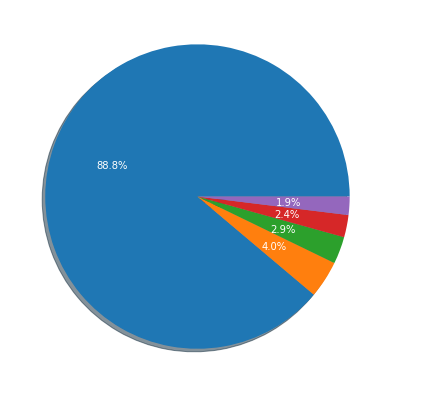

In [601]:
#fundig by country

df_by_country=df_clean.groupby('Country').agg(funding_country=('Funding (Millions)', 'sum')).sort_values(by='funding_country', ascending=False)

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(df_by_country['funding_country'][0:5], labels=list(df_by_country.index[0:5]), autopct='%1.1f%%',
        shadow=True, startangle=00)

plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white"})

plt.show()

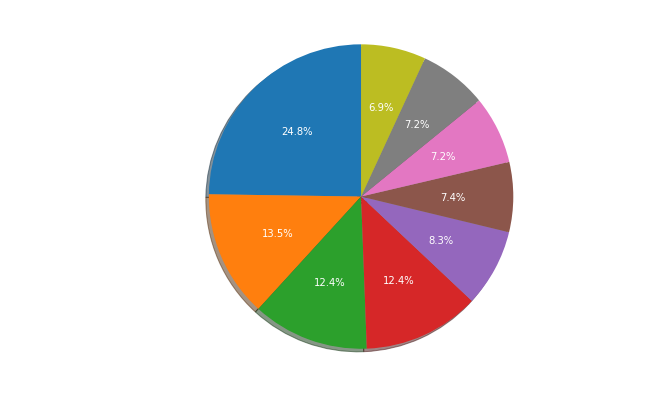

In [602]:
# by research field

df_by_field=df_clean.groupby('Business').agg(research_field=('Funding (Millions)', 'sum')).sort_values(by='research_field', ascending=False)

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(df_by_field['research_field'][0:9], labels=list(df_by_field.index[0:9]), autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white"})

plt.show()


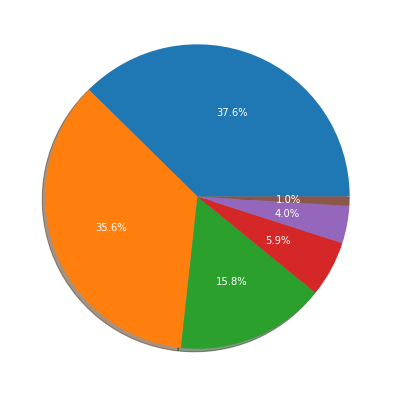

In [603]:
# start-ups by serie
series = df_clean['Series'].value_counts()

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(series, labels=series.index, autopct='%1.1f%%',
        shadow=True, startangle=0)

plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white"})

plt.show()

#NA = Not Available